In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
spotify_data = pd.read_csv("data/SpotifyFeatures.csv")
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
df = spotify_data
genre_OHE = pd.get_dummies(df.genre)
key_OHE = pd.get_dummies(df.key)

In [5]:
key_OHE.head()

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
genre_OHE.head()

,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df["artist_name"]=df["artist_name"].str.replace("[", " ", regex=True)
df["artist_name"]=df["artist_name"].str.replace("]", " ", regex=True)
df["artist_name"]=df["artist_name"].str.replace("'", " ", regex=True)

df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
df['track_name'] = df['track_name'].str.replace("'","", regex=True)
df['track_name'] = df['track_name'].str.replace("[","", regex=True)
df['track_name'] = df['track_name'].str.replace("]","", regex=True)

df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df['duration_min'].head()

0    1.66
1    2.29
2    2.84
3    2.54
4    1.38
Name: duration_min, dtype: float64

In [10]:
df.drop(['duration_ms'],inplace=True,axis=1)

In [11]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,Cest beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.66
1,Movie,Martin & les fées,Perdu davance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.29
2,Movie,Joseph Williams,Dont Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.84
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.54
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.38


In [12]:
client_id = "ccdf31a60e9c435e80f66b646557f0c3"
client_secret= "ba55bfd12503463dbe75093fe8f97549"

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:8881/callback'
  )
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)

{'Anime': '5d79M4mXtWtuQsr5DhapzR', 'Raigasen 2': '6B6OvtdVgAwVCQzLy1V0Ge', 'Raigasen': '5ZCiKr9qLp2lRKxJiQOKNg'}


In [14]:
#creating the playlist dataframe with extended features using Spotify data
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist
playlist_df = generate_playlist_df('Raigasen 2', playlist_dic, spotify_data) 

In [15]:
playlist_df

,artist,track_name,track_id,url,date_added
62,Marvin Gaye,Ain't No Mountain High Enough - Mono Version,4njseCGxWeZUksjhrqkleT,https://i.scdn.co/image/ab67616d00001e0238625a...,2022-02-16 02:16:47+00:00
61,Panic! At The Disco,High Hopes,1rqqCSm0Qe4I9rUvWncaom,https://i.scdn.co/image/ab67616d00001e02c51485...,2022-02-15 22:46:07+00:00
60,Panic! At The Disco,King of the Clouds,50Hv5NZIM0puIUoBttjpfb,https://i.scdn.co/image/ab67616d00001e02c51485...,2022-02-15 22:45:58+00:00
40,Young Rising Sons,SAD (Clap Your Hands),22jEGuVPtvtMqKPuXdOVCh,https://i.scdn.co/image/ab67616d00001e021d00f6...,2021-11-16 20:06:50+00:00
30,Gym Class Heroes,The Fighter (feat. Ryan Tedder),77ZdAoTHYoF6Umo76HFD4m,https://i.scdn.co/image/ab67616d00001e0218b808...,2021-09-29 03:00:14+00:00
25,Parachute,Without You,6R6ux6KaKrhAg2EIB2krdU,https://i.scdn.co/image/ab67616d00001e02bf4ed2...,2021-09-18 22:52:05+00:00
24,Less Than Jake,All My Best Friends Are Metalheads,1hh4GY1zM7SUAyM3a2ziH5,https://i.scdn.co/image/ab67616d00001e020a1dfe...,2021-09-18 02:26:46+00:00
23,The Strumbellas,Spirits,7GJ572zvnU94VZVrj5XRtb,https://i.scdn.co/image/ab67616d00001e0250352e...,2021-09-18 02:16:05+00:00
16,The Kooks,Bad Habit,3huV7eiNpaQlCB3LbZi9bB,https://i.scdn.co/image/ab67616d00001e022bc58e...,2021-09-10 21:24:16+00:00
15,Green Day,Still Breathing,19YmvsVCetCBeVj6O2mljR,https://i.scdn.co/image/ab67616d00001e02af71e8...,2021-09-10 21:17:19+00:00


C:\Users\bhagy\AppData\Local\Temp/ipykernel_5452/3234382743.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


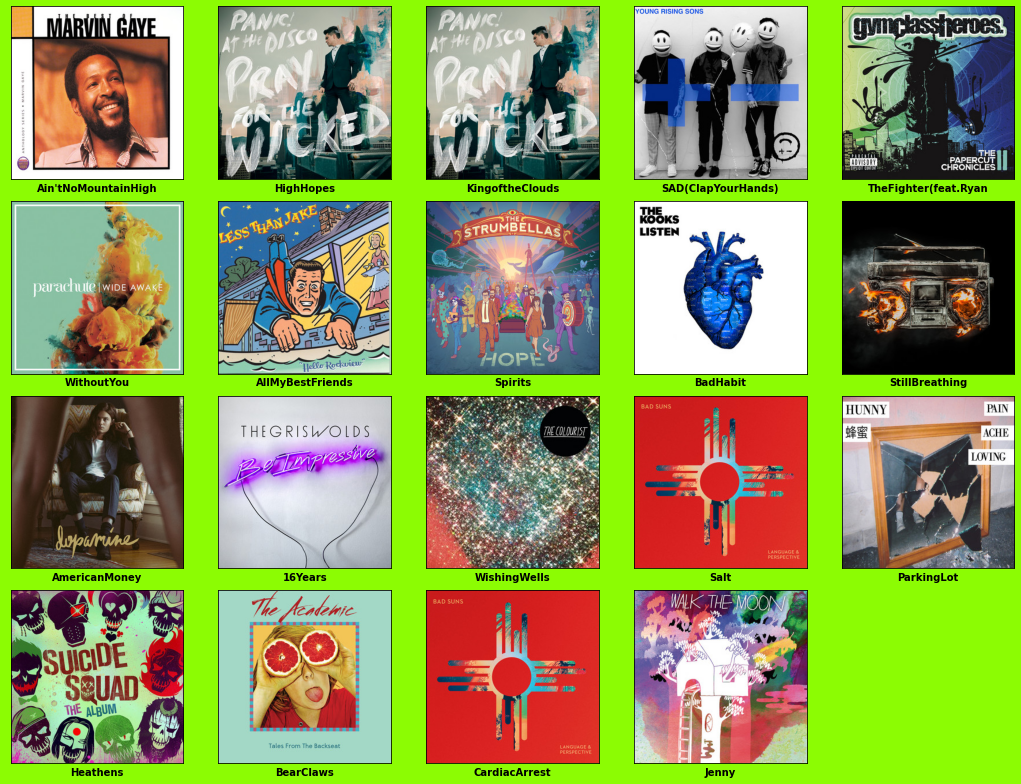

In [16]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))) , facecolor='#8cfc03')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()
    
visualize_cover_art(playlist_df)

In [17]:
playlist_df.to_csv('playlist.csv')

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaled_features = MinMaxScaler().fit_transform([
  df['acousticness'].values,
  df['danceability'].values,
  df['duration_min'].values,
  df['energy'].values,
  df['instrumentalness'].values,
  df['liveness'].values,
  df['loudness'].values,
  df['speechiness'].values,
  df['tempo'].values,
  df['valence'].values,
  ])

In [19]:
df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']] = scaled_features.T


In [20]:
df = df.drop('genre', axis = 1)
df = df.drop('artist_name', axis = 1)
df = df.drop('track_name', axis = 1)
df = df.drop('popularity',axis = 1)
df = df.drop('key', axis = 1)
df = df.drop('mode', axis = 1)
df = df.drop('time_signature', axis = 1)

In [21]:
df = df.join(genre_OHE)
df = df.join(key_OHE)

In [22]:
df.shape

(232725, 51)

In [23]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [24]:
playlist_vector, nonplaylist_df = generate_playlist_vector(df, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.head())

(51,)
                 track_id  acousticness  danceability    energy  \
0  0BRjO6ga9RKCKjfDqeFgWV      0.014449      0.013134  0.016221   
1  0BjC1NfoEOOusryehmNudP      0.032329      0.034244  0.035063   
2  0CoSDzoNIKCRs124s9uTVy      0.130823      0.128274  0.123581   
3  0Gc6TVm52BwZD07Ki6tIvf      0.070030      0.067513  0.067980   
4  0IuslXpMROHdEPvSl1fTQK      0.136651      0.132823  0.132168   

   instrumentalness  liveness  loudness  speechiness  tempo   valence  ...  B  \
0          0.010830  0.012879       0.0     0.011141    1.0  0.015652  ...  0   
1          0.030959  0.031800       0.0     0.031442    1.0  0.035503  ...  0   
2          0.122425  0.123334       0.0     0.122745    1.0  0.125671  ...  0   
3          0.066208  0.066743       0.0     0.066423    1.0  0.067442  ...  0   
4          0.131537  0.132026       0.0     0.131059    1.0  0.133188  ...  0   

   C  C#  D  D#  E  F  F#  G  G#  
0  0   1  0   0  0  0   0  0   0  
1  0   0  0   0  0  0   1  0   0  

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [26]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  
top15

C:\Users\bhagy\AppData\Local\Temp/ipykernel_5452/4057176304.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,...,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,duration_ms,sim,url
149210,Pop,DJ Khaled,Shining (feat. Beyoncé & Jay-Z),7Fa5UNizycSms5jP3SQD3F,58,0.047324,0.053409,0.053741,0.046873,D,...,0.0,Minor,0.047775,1.0,4/4,0.051766,4.73,0.087125,0.966733,https://i.scdn.co/image/ab67616d00001e027b219c...
225021,Rock,Red Hot Chili Peppers,Aeroplane,0VLdJcQUsqHBBwqPp4CIKJ,64,0.044725,0.050325,0.052209,0.044305,F,...,0.0,Major,0.044902,1.0,4/4,0.049986,4.75,0.089053,0.966733,https://i.scdn.co/image/ab67616d00001e027f3dcf...
110677,Pop,Lil Dicky,Lemme Freak,0egGmGkZ8maYdEYo4RrVsZ,66,0.046809,0.053055,0.051910,0.046695,F,...,0.0,Minor,0.047601,1.0,4/4,0.050161,4.76,0.084534,0.966732,https://i.scdn.co/image/ab67616d00001e02459898...
226186,Rock,Shane & Shane,Psalm 46 (Live),2lqc2v750cfFJx6kvkUikn,59,0.049911,0.052378,0.053680,0.049131,D,...,0.0,Minor,0.049371,1.0,4/4,0.051420,4.74,0.081785,0.966731,https://i.scdn.co/image/ab67616d00001e02114c90...
111228,Pop,will.i.am,Scream & Shout,2iJuuzV8P9Yz0VSurttIV5,73,0.050175,0.055676,0.055040,0.050036,F,...,0.0,Major,0.050544,1.0,4/4,0.053696,4.72,0.084518,0.966731,https://i.scdn.co/image/ab67616d00001e02e60821...
225263,Rock,The Growlers,One Million Lovers,4BOHngI1gLDA5OZFTZVAHl,54,0.054027,0.052037,0.054120,0.047375,F,...,0.0,Minor,0.047666,1.0,4/4,0.053690,4.71,0.091368,0.966730,https://i.scdn.co/image/ab67616d00001e02bdde34...
226127,Rock,The National,Dont Swallow the Cap,0QEHU0ZccfSXYUpF2iVUab,61,0.049017,0.049275,0.050420,0.047043,F,...,0.0,Major,0.047015,1.0,4/4,0.049324,4.76,0.072866,0.966730,https://i.scdn.co/image/ab67616d00001e02dde1a4...
155823,Rock,Widespread Panic,Climb to Safety,2tKvbXiqQM7aYhbpEWLbTf,48,0.041967,0.045108,0.048742,0.040689,D,...,0.0,Major,0.041129,1.0,4/4,0.047783,4.69,0.083514,0.966730,https://i.scdn.co/image/ab67616d00001e020b7bf2...
154395,Rock,Led Zeppelin,Misty Mountain Hop - Alternate Mix,05BTaDBhGylMDjupCczCwC,52,0.051597,0.054544,0.057436,0.054530,D,...,0.0,Major,0.051406,1.0,4/4,0.055883,4.75,0.085056,0.966728,https://i.scdn.co/image/ab67616d00001e02c8a11e...
111980,Pop,Tevin Campbell,Can We Talk,6a5jHgwqYMk9wlYJYfs3c9,65,0.041715,0.044953,0.045247,0.041293,D,...,0.0,Minor,0.041529,1.0,4/4,0.044708,4.74,0.067657,0.966727,https://i.scdn.co/image/ab67616d00001e029af004...


C:\Users\bhagy\AppData\Local\Temp/ipykernel_5452/3234382743.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(temp) / columns + 1, columns, i + 1)


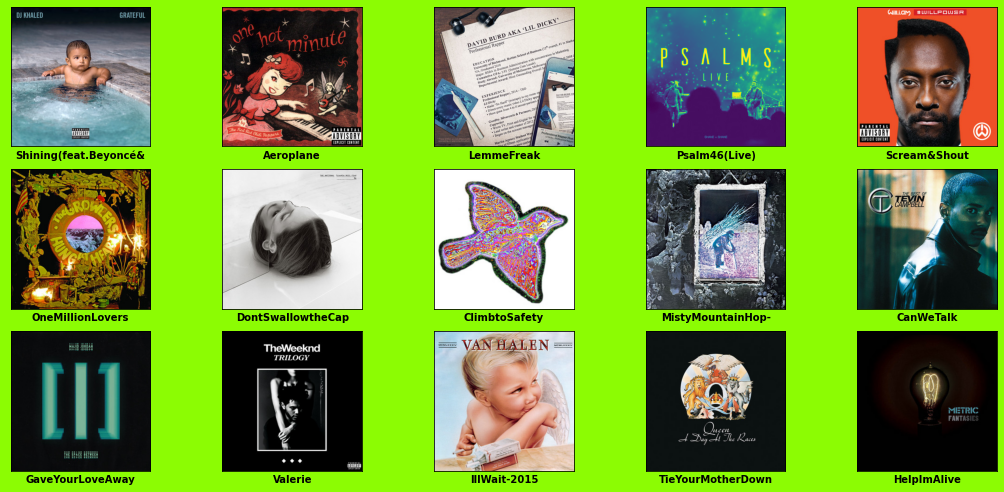

In [27]:
visualize_cover_art(top15)